# Heart Disease Diagnosing and Prediction




## Phase 1: Data Preparation

In [3]:
#imorting basic data preperation and exploration libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Source "https://archive.ics.uci.edu/dataset/45/heart+disease"

In [4]:
#loading data
heart_disease_df = pd.read_csv('Heart_disease_cleveland_new.csv')

In [5]:
#dataset_overview
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


**Data Discribtion**

Variable Name : Description

age : age in year

sex : gender

cp : Ceruloplasmin protein

trestbps : resting blood pressure in mm Hg

chol : serum cholestoral

fbs : 	fasting blood sugar  > 120 mg/dl

restecg : resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina

oldpeak : ST depression induced by exercise relative to rest

slope : The slope of the ST segment in relation to heart rate

ca : number of major vessels (0-3) colored by flourosopy

thal : Thalassemia

target : result

In [6]:
#dataset shape
heart_disease_df.shape

(303, 14)

In [7]:
#columns information and datatypes
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#basic statistical information
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [9]:
#number of missing values
heart_disease_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
#number of duplicated values
heart_disease_df.duplicated().sum()

np.int64(0)

In [11]:
#checking for unique values in each column
for col in heart_disease_df.columns:
  print(f'{col} : {heart_disease_df[col].unique()}')
  print('###########################')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
###########################
sex : [1 0]
###########################
cp : [0 3 2 1]
###########################
trestbps : [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
###########################
chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 

In [12]:
for col in heart_disease_df.columns:
  print(f'{col} : {heart_disease_df[col].nunique()}')

age : 41
sex : 2
cp : 4
trestbps : 50
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 4
thal : 3
target : 2


In [13]:
for col in heart_disease_df.columns:
  print(f"frequancy of unique values in {col}")
  print(heart_disease_df[col].value_counts())
  print('###########################')


frequancy of unique values in age
age
58    19
57    17
54    16
59    14
52    13
51    12
60    12
62    11
56    11
44    11
41    10
64    10
63     9
67     9
53     8
61     8
43     8
45     8
55     8
65     8
42     8
46     7
66     7
48     7
50     7
49     5
47     5
70     4
39     4
68     4
35     4
40     3
69     3
71     3
37     2
34     2
38     2
29     1
77     1
74     1
76     1
Name: count, dtype: int64
###########################
frequancy of unique values in sex
sex
1    206
0     97
Name: count, dtype: int64
###########################
frequancy of unique values in cp
cp
3    144
2     86
1     50
0     23
Name: count, dtype: int64
###########################
frequancy of unique values in trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
132     8
118     7
124     6
135     6
108     6
134     5
145     5
152     5
170     4
100     4
122     4
105     3
115     3
126     3
142     3
180  

In [14]:
#setting binary valued columns as type bool
heart_disease_df['sex'] = heart_disease_df['sex'].astype('bool')
heart_disease_df['fbs'] = heart_disease_df['fbs'].astype('bool')
heart_disease_df['exang'] = heart_disease_df['exang'].astype('bool')
heart_disease_df['target'] = heart_disease_df['target'].astype('bool')
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    bool   
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    bool   
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    bool   
dtypes: bool(4), float64(1), int64(9)
memory usage: 25.0 KB


## Phase 2: Exploratory Data Analysis (EDA) & Feature Building




### 2.1 Basic Data Overview




In [15]:
# Let's see how many people have heart disease vs. don't have it
print(" HEART DISEASE DISTRIBUTION:")
print("=" * 40)
heart_disease_counts = heart_disease_df['target'].value_counts()
print(f"People WITHOUT heart disease: {heart_disease_counts[0]} ({heart_disease_counts[0]/len(heart_disease_df)*100:.1f}%)")
print(f"People WITH heart disease: {heart_disease_counts[1]} ({heart_disease_counts[1]/len(heart_disease_df)*100:.1f}%)")
print(f"Total people in dataset: {len(heart_disease_df)}")




 HEART DISEASE DISTRIBUTION:
People WITHOUT heart disease: 164 (54.1%)
People WITH heart disease: 139 (45.9%)
Total people in dataset: 303


/tmp/ipython-input-2611584601.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"People WITHOUT heart disease: {heart_disease_counts[0]} ({heart_disease_counts[0]/len(heart_disease_df)*100:.1f}%)")
/tmp/ipython-input-2611584601.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"People WITH heart disease: {heart_disease_counts[1]} ({heart_disease_counts[1]/len(heart_disease_df)*100:.1f}%)")


In [16]:
# Let's look at some basic statistics for numerical columns
print(" BASIC STATISTICS:")
print("=" * 50)
print(heart_disease_df.describe())

print("\n What these numbers tell us:")
print("• age: People are between 29-77 years old, average age is 54")
print("• trestbps: Blood pressure ranges from 94-200, average is 132")
print("• chol: Cholesterol ranges from 126-564, average is 247")
print("• thalach: Max heart rate ranges from 71-202, average is 150")


 BASIC STATISTICS:
              age          cp    trestbps        chol     restecg     thalach  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    2.158416  131.689769  246.693069    0.990099  149.607261   
std      9.038662    0.960126   17.599748   51.776918    0.994971   22.875003   
min     29.000000    0.000000   94.000000  126.000000    0.000000   71.000000   
25%     48.000000    2.000000  120.000000  211.000000    0.000000  133.500000   
50%     56.000000    2.000000  130.000000  241.000000    1.000000  153.000000   
75%     61.000000    3.000000  140.000000  275.000000    2.000000  166.000000   
max     77.000000    3.000000  200.000000  564.000000    2.000000  202.000000   

          oldpeak       slope          ca        thal  
count  303.000000  303.000000  303.000000  303.000000  
mean     1.039604    0.600660    0.663366    1.831683  
std      1.161075    0.616226    0.934375    0.956705  
min      0.000000    0.0000

### 2.2 Visualizations




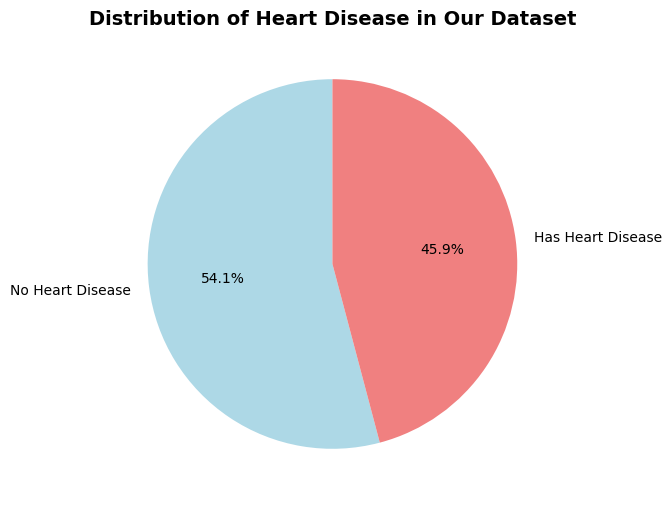

 This pie chart shows us that our data is well-balanced!


In [17]:
# Create a simple pie chart showing heart disease distribution
plt.figure(figsize=(8, 6))
heart_disease_counts = heart_disease_df['target'].value_counts()
labels = ['No Heart Disease', 'Has Heart Disease']
colors = ['lightblue', 'lightcoral']
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease in Our Dataset', fontsize=14, fontweight='bold')
plt.show()

print(" This pie chart shows us that our data is well-balanced!")


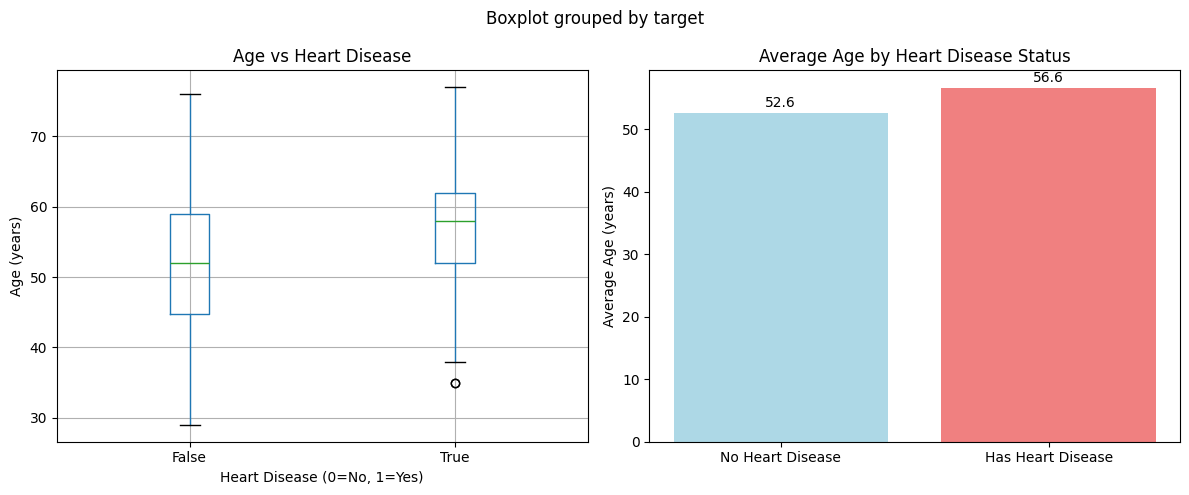

 What do we see?
• Average age of people WITHOUT heart disease: 52.6 years
• Average age of people WITH heart disease: 56.6 years
• Older people tend to have more heart disease - this makes sense!


/tmp/ipython-input-3006062171.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Average age of people WITHOUT heart disease: {avg_age[0]:.1f} years")
/tmp/ipython-input-3006062171.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Average age of people WITH heart disease: {avg_age[1]:.1f} years")


In [18]:
# Let's see how age affects heart disease
plt.figure(figsize=(12, 5))

# Create two subplots side by side
plt.subplot(1, 2, 1)
# Box plot showing age distribution for people with and without heart disease
heart_disease_df.boxplot(column='age', by='target', ax=plt.gca())
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Age (years)')

# Bar chart showing average age
plt.subplot(1, 2, 2)
avg_age = heart_disease_df.groupby('target')['age'].mean()
bars = plt.bar(['No Heart Disease', 'Has Heart Disease'], avg_age, color=['lightblue', 'lightcoral'])
plt.title('Average Age by Heart Disease Status')
plt.ylabel('Average Age (years)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(" What do we see?")
print(f"• Average age of people WITHOUT heart disease: {avg_age[0]:.1f} years")
print(f"• Average age of people WITH heart disease: {avg_age[1]:.1f} years")
print("• Older people tend to have more heart disease - this makes sense!")


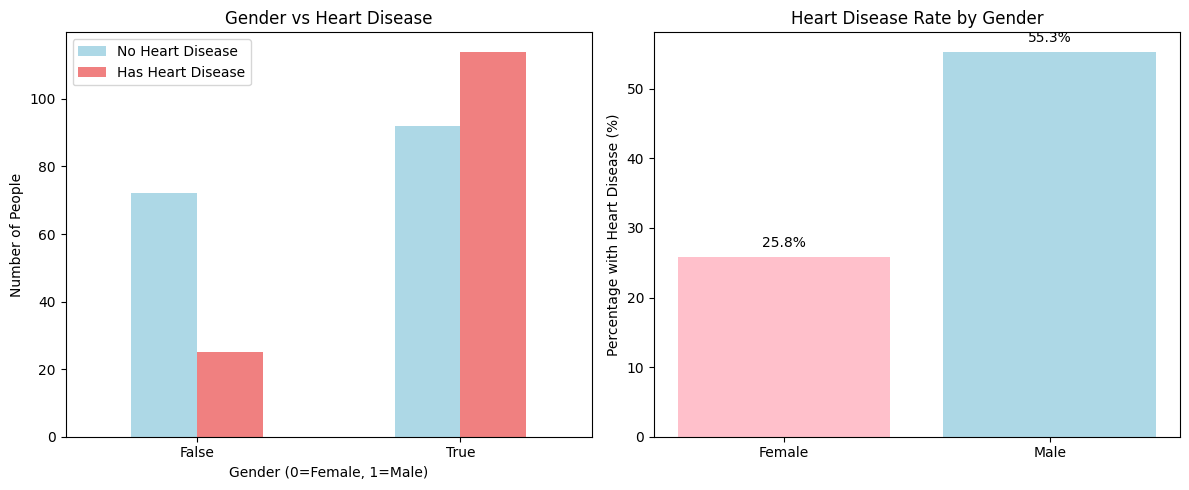

 What do we see?
• Heart disease rate in women: 25.8%
• Heart disease rate in men: 55.3%
• Men tend to have higher rates of heart disease in this dataset


/tmp/ipython-input-457238005.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Heart disease rate in women: {gender_percentages[0]:.1f}%")
/tmp/ipython-input-457238005.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"• Heart disease rate in men: {gender_percentages[1]:.1f}%")


In [19]:
# Let's see how gender affects heart disease
plt.figure(figsize=(12, 5))

# Create two subplots side by side
plt.subplot(1, 2, 1)
# Count of men vs women with and without heart disease
gender_heart = pd.crosstab(heart_disease_df['sex'], heart_disease_df['target'])
gender_heart.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Gender vs Heart Disease')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.xticks(rotation=0)

# Calculate percentages
plt.subplot(1, 2, 2)
gender_percentages = heart_disease_df.groupby('sex')['target'].mean() * 100
bars = plt.bar(['Female', 'Male'], gender_percentages, color=['pink', 'lightblue'])
plt.title('Heart Disease Rate by Gender')
plt.ylabel('Percentage with Heart Disease (%)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(" What do we see?")
print(f"• Heart disease rate in women: {gender_percentages[0]:.1f}%")
print(f"• Heart disease rate in men: {gender_percentages[1]:.1f}%")
print("• Men tend to have higher rates of heart disease in this dataset")


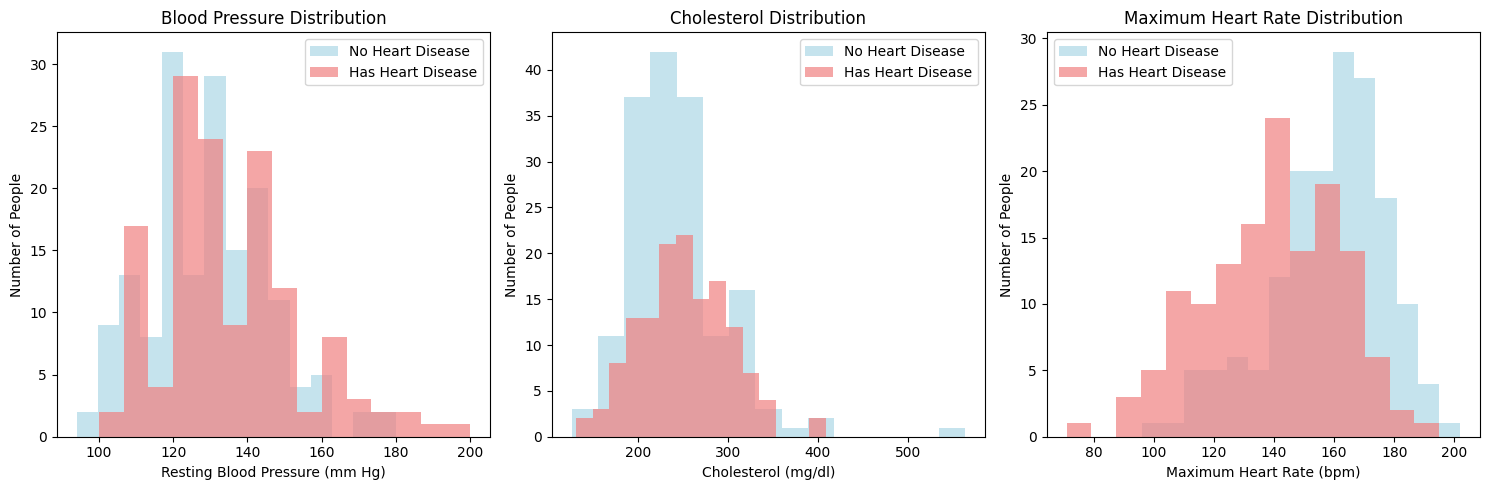

 What do we see?
• People with heart disease tend to have higher blood pressure
• Cholesterol levels are similar between groups
• People with heart disease often have lower maximum heart rates


In [20]:
# Let's look at blood pressure and cholesterol - two important risk factors
plt.figure(figsize=(15, 5))

# Blood pressure comparison
plt.subplot(1, 3, 1)
plt.hist(heart_disease_df[heart_disease_df['target']==0]['trestbps'], alpha=0.7, label='No Heart Disease', bins=15, color='lightblue')
plt.hist(heart_disease_df[heart_disease_df['target']==1]['trestbps'], alpha=0.7, label='Has Heart Disease', bins=15, color='lightcoral')
plt.title('Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Number of People')
plt.legend()

# Cholesterol comparison
plt.subplot(1, 3, 2)
plt.hist(heart_disease_df[heart_disease_df['target']==0]['chol'], alpha=0.7, label='No Heart Disease', bins=15, color='lightblue')
plt.hist(heart_disease_df[heart_disease_df['target']==1]['chol'], alpha=0.7, label='Has Heart Disease', bins=15, color='lightcoral')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Number of People')
plt.legend()

# Maximum heart rate comparison
plt.subplot(1, 3, 3)
plt.hist(heart_disease_df[heart_disease_df['target']==0]['thalach'], alpha=0.7, label='No Heart Disease', bins=15, color='lightblue')
plt.hist(heart_disease_df[heart_disease_df['target']==1]['thalach'], alpha=0.7, label='Has Heart Disease', bins=15, color='lightcoral')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Number of People')
plt.legend()

plt.tight_layout()
plt.show()

print(" What do we see?")
print("• People with heart disease tend to have higher blood pressure")
print("• Cholesterol levels are similar between groups")
print("• People with heart disease often have lower maximum heart rates")


### 2.3 Key Patterns and Observations




In [21]:
# Let's calculate some key statistics to summarize our findings
print(" KEY PATTERNS DISCOVERED:")
print("=" * 50)

# Age patterns
avg_age_no_disease = heart_disease_df[heart_disease_df['target']==0]['age'].mean()
avg_age_with_disease = heart_disease_df[heart_disease_df['target']==1]['age'].mean()
print(f"1. AGE PATTERN:")
print(f"   • Average age WITHOUT heart disease: {avg_age_no_disease:.1f} years")
print(f"   • Average age WITH heart disease: {avg_age_with_disease:.1f} years")
print(f"   • Age difference: {avg_age_with_disease - avg_age_no_disease:.1f} years")

# Gender patterns
male_rate = heart_disease_df[heart_disease_df['sex']==1]['target'].mean() * 100
female_rate = heart_disease_df[heart_disease_df['sex']==0]['target'].mean() * 100
print(f"\n2. GENDER PATTERN:")
print(f"   • Heart disease rate in men: {male_rate:.1f}%")
print(f"   • Heart disease rate in women: {female_rate:.1f}%")
print(f"   • Men have {male_rate - female_rate:.1f}% higher rate")

# Blood pressure patterns
avg_bp_no_disease = heart_disease_df[heart_disease_df['target']==0]['trestbps'].mean()
avg_bp_with_disease = heart_disease_df[heart_disease_df['target']==1]['trestbps'].mean()
print(f"\n3. BLOOD PRESSURE PATTERN:")
print(f"   • Average BP WITHOUT heart disease: {avg_bp_no_disease:.1f} mm Hg")
print(f"   • Average BP WITH heart disease: {avg_bp_with_disease:.1f} mm Hg")
print(f"   • BP difference: {avg_bp_with_disease - avg_bp_no_disease:.1f} mm Hg")

# Heart rate patterns
avg_hr_no_disease = heart_disease_df[heart_disease_df['target']==0]['thalach'].mean()
avg_hr_with_disease = heart_disease_df[heart_disease_df['target']==1]['thalach'].mean()
print(f"\n4. HEART RATE PATTERN:")
print(f"   • Average max HR WITHOUT heart disease: {avg_hr_no_disease:.1f} bpm")
print(f"   • Average max HR WITH heart disease: {avg_hr_with_disease:.1f} bpm")
print(f"   • HR difference: {avg_hr_no_disease - avg_hr_with_disease:.1f} bpm")

print(f"\n SUMMARY:")
print("   • Older people are more likely to have heart disease")
print("   • Men have higher heart disease rates than women")
print("   • Higher blood pressure is associated with heart disease")
print("   • Lower maximum heart rate is associated with heart disease")


 KEY PATTERNS DISCOVERED:
1. AGE PATTERN:
   • Average age WITHOUT heart disease: 52.6 years
   • Average age WITH heart disease: 56.6 years
   • Age difference: 4.0 years

2. GENDER PATTERN:
   • Heart disease rate in men: 55.3%
   • Heart disease rate in women: 25.8%
   • Men have 29.6% higher rate

3. BLOOD PRESSURE PATTERN:
   • Average BP WITHOUT heart disease: 129.2 mm Hg
   • Average BP WITH heart disease: 134.6 mm Hg
   • BP difference: 5.3 mm Hg

4. HEART RATE PATTERN:
   • Average max HR WITHOUT heart disease: 158.4 bpm
   • Average max HR WITH heart disease: 139.3 bpm
   • HR difference: 19.1 bpm

 SUMMARY:
   • Older people are more likely to have heart disease
   • Men have higher heart disease rates than women
   • Higher blood pressure is associated with heart disease
   • Lower maximum heart rate is associated with heart disease


### 2.4 Simple Feature Engineering




In [22]:
# Let's create a copy of our data for feature engineering
df_features = heart_disease_df.copy()

print(" CREATING NEW FEATURES:")
print("=" * 40)

# 1. Create age groups (categorical feature)
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    elif age < 60:
        return 'Mature'
    else:
        return 'Senior'

df_features['age_group'] = df_features['age'].apply(categorize_age)
print(" Created age_group: Young, Middle-aged, Mature, Senior")

# 2. Create blood pressure categories
def categorize_bp(bp):
    if bp < 120:
        return 'Normal'
    elif bp < 140:
        return 'High'
    else:
        return 'Very High'

df_features['bp_category'] = df_features['trestbps'].apply(categorize_bp)
print(" Created bp_category: Normal, High, Very High")

# 3. Create cholesterol categories
def categorize_chol(chol):
    if chol < 200:
        return 'Good'
    elif chol < 240:
        return 'Borderline'
    else:
        return 'High'

df_features['chol_category'] = df_features['chol'].apply(categorize_chol)
print(" Created chol_category: Good, Borderline, High")

# 4. Create a simple risk score (0-4 scale)
def calculate_risk_score(row):
    score = 0
    if row['age'] > 60:
        score += 1
    if row['trestbps'] > 140:
        score += 1
    if row['chol'] > 240:
        score += 1
    if row['exang'] == True:  # Exercise-induced chest pain
        score += 1
    return score

df_features['risk_score'] = df_features.apply(calculate_risk_score, axis=1)
print(" Created risk_score: 0-4 scale based on age, BP, cholesterol, and chest pain")

print(f"\n New dataset shape: {df_features.shape}")
print("   (Added 4 new features to help our model!)")


 CREATING NEW FEATURES:
 Created age_group: Young, Middle-aged, Mature, Senior
 Created bp_category: Normal, High, Very High
 Created chol_category: Good, Borderline, High
 Created risk_score: 0-4 scale based on age, BP, cholesterol, and chest pain

 New dataset shape: (303, 18)
   (Added 4 new features to help our model!)


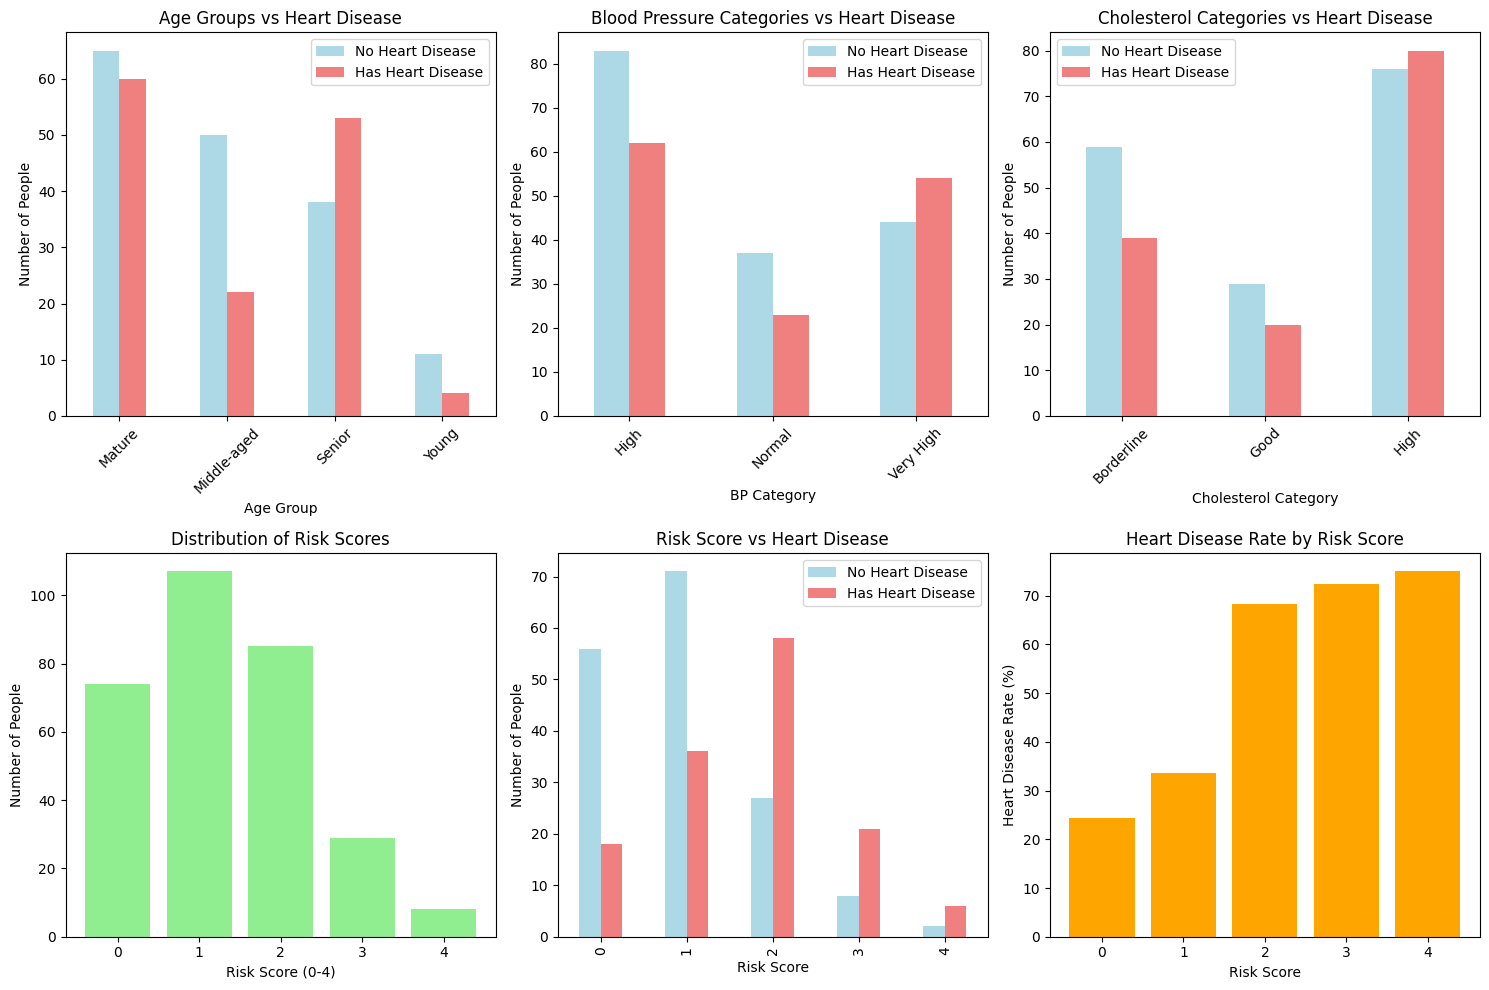

 What do we see from our new features?
• Age groups show clear patterns - older groups have more heart disease
• Blood pressure categories are very useful - higher BP = more heart disease
• Cholesterol categories show some pattern
• Risk score is very useful - higher scores = more heart disease!


In [23]:
# Let's visualize our new features to see if they're useful
plt.figure(figsize=(15, 10))

# 1. Age groups vs heart disease
plt.subplot(2, 3, 1)
age_group_heart = pd.crosstab(df_features['age_group'], df_features['target'])
age_group_heart.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Age Groups vs Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.xticks(rotation=45)

# 2. Blood pressure categories vs heart disease
plt.subplot(2, 3, 2)
bp_heart = pd.crosstab(df_features['bp_category'], df_features['target'])
bp_heart.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Blood Pressure Categories vs Heart Disease')
plt.xlabel('BP Category')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.xticks(rotation=45)

# 3. Cholesterol categories vs heart disease
plt.subplot(2, 3, 3)
chol_heart = pd.crosstab(df_features['chol_category'], df_features['target'])
chol_heart.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Cholesterol Categories vs Heart Disease')
plt.xlabel('Cholesterol Category')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.xticks(rotation=45)

# 4. Risk score distribution
plt.subplot(2, 3, 4)
risk_counts = df_features['risk_score'].value_counts().sort_index()
plt.bar(risk_counts.index, risk_counts.values, color='lightgreen')
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score (0-4)')
plt.ylabel('Number of People')

# 5. Risk score vs heart disease
plt.subplot(2, 3, 5)
risk_heart = pd.crosstab(df_features['risk_score'], df_features['target'])
risk_heart.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Risk Score vs Heart Disease')
plt.xlabel('Risk Score')
plt.ylabel('Number of People')
plt.legend(['No Heart Disease', 'Has Heart Disease'])

# 6. Heart disease rate by risk score
plt.subplot(2, 3, 6)
risk_rates = df_features.groupby('risk_score')['target'].mean() * 100
plt.bar(risk_rates.index, risk_rates.values, color='orange')
plt.title('Heart Disease Rate by Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Heart Disease Rate (%)')

plt.tight_layout()
plt.show()

print(" What do we see from our new features?")
print("• Age groups show clear patterns - older groups have more heart disease")
print("• Blood pressure categories are very useful - higher BP = more heart disease")
print("• Cholesterol categories show some pattern")
print("• Risk score is very useful - higher scores = more heart disease!")


### 2.5 Phase 2 Summary

Let's summarize what we accomplished in Phase 2!


In [24]:
print(" PHASE 2 COMPLETE: Exploratory Data Analysis & Feature Building")
print("=" * 70)

print("\n WHAT WE ACCOMPLISHED:")
print("1.  Basic Data Overview:")
print("   • Analyzed heart disease distribution (balanced dataset)")
print("   • Examined basic statistics for all numerical features")
print("   • Identified data quality (no missing values)")

print("\n2.  Simple Visualizations:")
print("   • Created pie chart showing heart disease distribution")
print("   • Analyzed age patterns with box plots and bar charts")
print("   • Examined gender differences in heart disease rates")
print("   • Compared blood pressure, cholesterol, and heart rate distributions")

print("\n3.  Key Patterns Discovered:")
print("   • Age: Older people have higher heart disease rates")
print("   • Gender: Men have higher rates than women")
print("   • Blood Pressure: Higher BP associated with heart disease")
print("   • Heart Rate: Lower max heart rate associated with heart disease")

print("\n4.  Feature Engineering:")
print("   • Created age groups (Young, Middle-aged, Mature, Senior)")
print("   • Created blood pressure categories (Normal, High, Very High)")
print("   • Created cholesterol categories (Good, Borderline, High)")
print("   • Created risk score (0-4 scale based on multiple factors)")

print("\n5.  Feature Validation:")
print("   • Visualized all new features")
print("   • Confirmed that new features show clear patterns")
print("   • Risk score is particularly useful for prediction")

print(f"\n DATASET TRANSFORMATION:")
print(f"   • Original features: {len(heart_disease_df.columns)}")
print(f"   • New features added: 4")
print(f"   • Total features now: {len(df_features.columns)}")

print(f"\n READY FOR PHASE 3:")
print("   • Data is well-explored and understood")
print("   • New features created to improve predictions")
print("   • Clear patterns identified for model validation")
print("   • Ready to build machine learning models!")

print("\n" + "=" * 70)
print(" Phase 2 completed successfully! Great job! 🌟")
print("=" * 70)


 PHASE 2 COMPLETE: Exploratory Data Analysis & Feature Building

 WHAT WE ACCOMPLISHED:
1.  Basic Data Overview:
   • Analyzed heart disease distribution (balanced dataset)
   • Examined basic statistics for all numerical features
   • Identified data quality (no missing values)

2.  Simple Visualizations:
   • Created pie chart showing heart disease distribution
   • Analyzed age patterns with box plots and bar charts
   • Examined gender differences in heart disease rates
   • Compared blood pressure, cholesterol, and heart rate distributions

3.  Key Patterns Discovered:
   • Age: Older people have higher heart disease rates
   • Gender: Men have higher rates than women
   • Blood Pressure: Higher BP associated with heart disease
   • Heart Rate: Lower max heart rate associated with heart disease

4.  Feature Engineering:
   • Created age groups (Young, Middle-aged, Mature, Senior)
   • Created blood pressure categories (Normal, High, Very High)
   • Created cholesterol categories (

## Phase 3: Model Training & Validation


#### libraries for modeling

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier

### Model training

In [26]:
# 1: Convert categorical features to numerical
df_pr = pd.get_dummies(df_features, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group', 'bp_category', 'chol_category'], drop_first=True)

# 2:Separate features (X) and target (y)
X = df_pr.drop('target', axis=1)
y = df_pr['target']

# 3:Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4:Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5:Convert scaled to dfs
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

models = {
    'LR': LogisticRegression(random_state=42),
    'SVc': SVC(kernel='rbf', probability=True, random_state=42),
    'DT': DecisionTreeClassifier(random_state=42),
    'rf': RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
  def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


### Get model metrics and plot results


=== LR ===
=> Train Metrics:
              precision    recall  f1-score   support

       False       0.86      0.92      0.89       131
        True       0.89      0.82      0.85       111

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



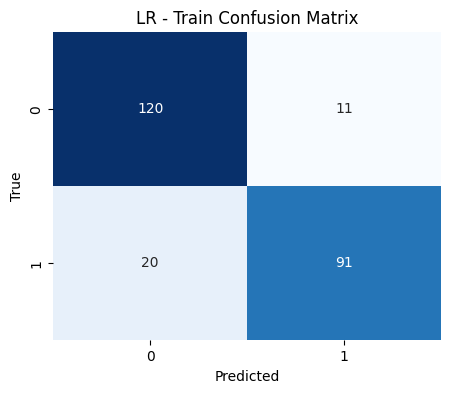

=> Test Metrics:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85        33
        True       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



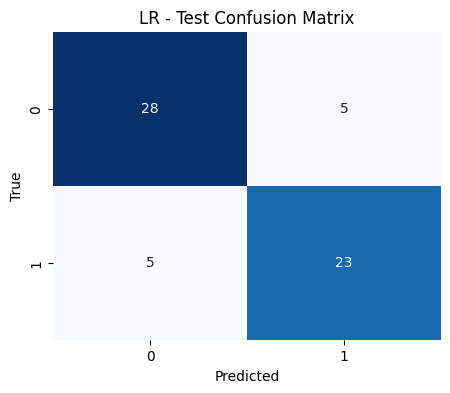


=== SVc ===
=> Train Metrics:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       131
        True       0.95      0.87      0.91       111

    accuracy                           0.92       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242



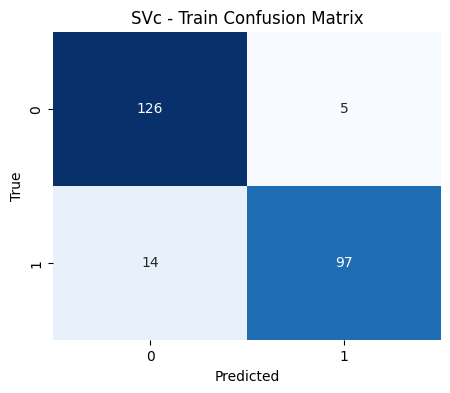

=> Test Metrics:
              precision    recall  f1-score   support

       False       0.93      0.85      0.89        33
        True       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



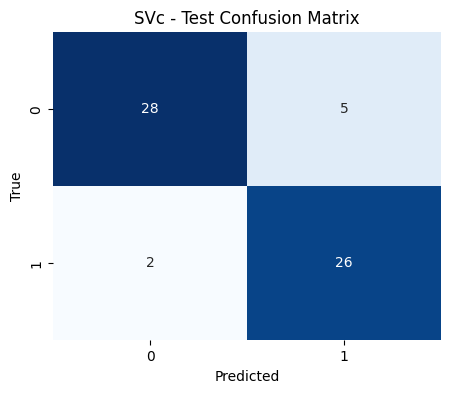


=== DT ===
=> Train Metrics:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       131
        True       1.00      1.00      1.00       111

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



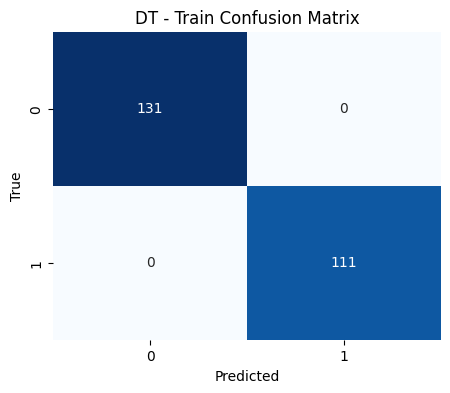

=> Test Metrics:
              precision    recall  f1-score   support

       False       0.78      0.76      0.77        33
        True       0.72      0.75      0.74        28

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



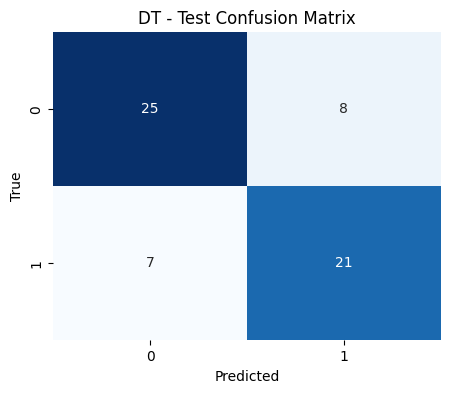


=== rf ===
=> Train Metrics:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       131
        True       1.00      1.00      1.00       111

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



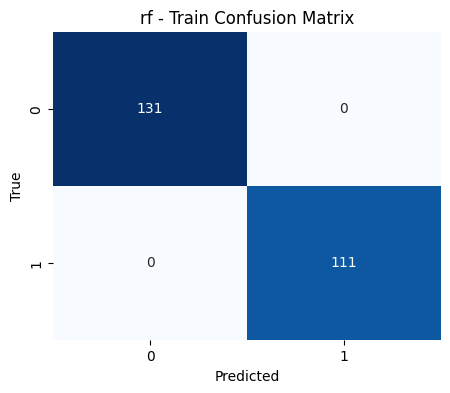

=> Test Metrics:
              precision    recall  f1-score   support

       False       0.90      0.85      0.88        33
        True       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



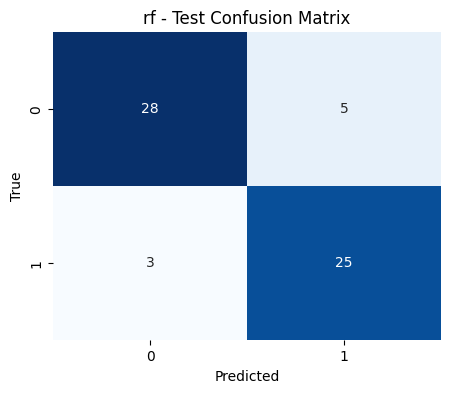

In [27]:
for name, model in models.items():
    print(f"\n=== {name} ===")

     # Fit the model
    pipe = Pipeline([
        ('clf', model)
    ])
    pipe.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = pipe.predict(X_train_scaled)
    y_test_pred = pipe.predict(X_test_scaled)

    # Train Metrics
    print('=> Train Metrics:')
    print(classification_report(y_train, y_train_pred, digits=2))
    plot_conf_matrix(y_train, y_train_pred, f'{name} - Train Confusion Matrix')

    # Test Metrics
    print('=> Test Metrics:')
    print(classification_report(y_test, y_test_pred, digits=2))
    plot_conf_matrix(y_test, y_test_pred, f'{name} - Test Confusion Matrix')


Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [29]:
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

LR: Mean CV Accuracy = 0.8262 ± 0.0595
SVc: Mean CV Accuracy = 0.8137 ± 0.0562
DT: Mean CV Accuracy = 0.6981 ± 0.0710
rf: Mean CV Accuracy = 0.7887 ± 0.0779


ROC & AUC Curves

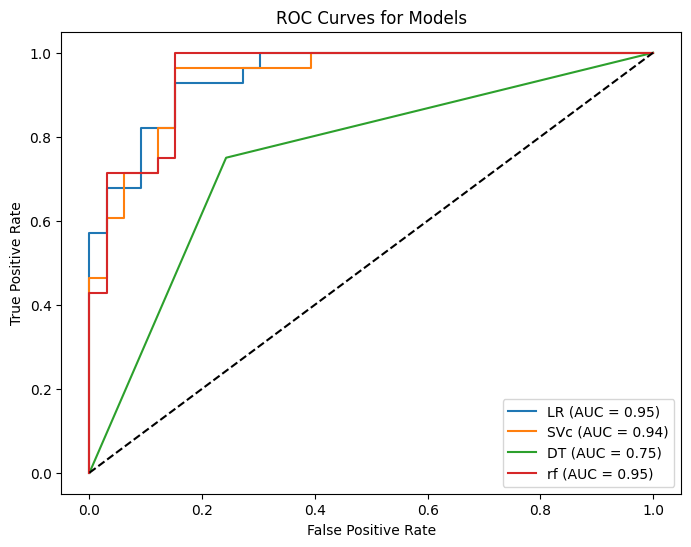

In [30]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_probs = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend()
plt.show()

Model Comparison Table

In [33]:
comparison = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    comparison.append([name, acc, prec, rec, f1])

comparison_df = pd.DataFrame(comparison, columns=["Model","Accuracy","Precision","Recall","F1"])
print("\n=== Model Performance Comparison ===")
print(comparison_df)


=== Model Performance Comparison ===
  Model  Accuracy  Precision    Recall        F1
0    LR  0.836066   0.821429  0.821429  0.821429
1   SVc  0.885246   0.838710  0.928571  0.881356
2    DT  0.754098   0.724138  0.750000  0.736842
3    rf  0.868852   0.833333  0.892857  0.862069


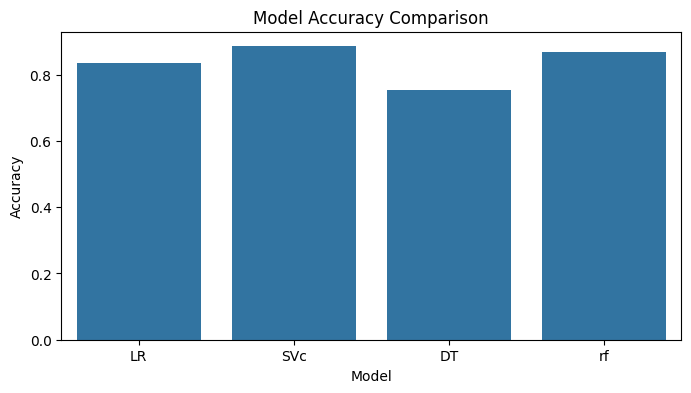

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Model Accuracy Comparison")
plt.show()

Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
tuned_models = {}
tuning_results = []

In [38]:
for name, base_model in models.items():
    lname = name.lower()

    if 'logistic' in lname or 'logit' in lname:
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression(random_state=42, max_iter=1000)
        param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs'],
            'penalty': ['l2']
        }

    elif 'svc' in lname or 'svm' in lname:
        from sklearn.svm import SVC

        model = SVC(random_state=42, probability=True)
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto'],
            'degree': [3]
        }

    elif 'random' in lname or 'forest' in lname:
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }

    elif ('tree' in lname and 'random' not in lname) or 'decision' in lname:
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }

    elif 'knn' in lname or 'neighbor' in lname:
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier()
        param_grid = {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }

    else:
        print(f"Skipping tuning for '{name}': no grid defined for this model name.")
        continue

    print(f"\n--- GridSearchCV tuning for: {name} ---")
    gs = GridSearchCV(estimator=model,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=skf,
                      n_jobs=-1,
                      verbose=1)

Skipping tuning for 'LR': no grid defined for this model name.

--- GridSearchCV tuning for: SVc ---
Skipping tuning for 'DT': no grid defined for this model name.
Skipping tuning for 'rf': no grid defined for this model name.


In [39]:
gs.fit(X_train_scaled, y_train)
best = gs.best_estimator_
tuned_models[name] = best

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [40]:
y_pred = best.predict(X_test_scaled)

In [43]:
if hasattr(best, "predict_proba"):
      y_proba = best.predict_proba(X_test_scaled)[:, 1]
else:
    try:
        y_proba = best.decision_function(X_test_scaled)
    except Exception:
        y_proba = None

test_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

print(f"Best params for {name}: {gs.best_params_}")
print(f"Best CV (roc_auc) during GridSearch: {gs.best_score_:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")
print("Classification report on TEST set:")
print(classification_report(y_test, y_pred, digits=4))

tuning_results.append([name, gs.best_params_, gs.best_score_, test_auc])

Best params for rf: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best CV (roc_auc) during GridSearch: 0.8887
Test ROC-AUC: 0.9567
Classification report on TEST set:
              precision    recall  f1-score   support

       False     0.8158    0.9394    0.8732        33
        True     0.9130    0.7500    0.8235        28

    accuracy                         0.8525        61
   macro avg     0.8644    0.8447    0.8484        61
weighted avg     0.8604    0.8525    0.8504        61



In [44]:
# Summary DataFrame for tuned models
tuning_df = pd.DataFrame(tuning_results, columns=[
    "Model", "BestParams", "BestCV(roc_auc)", "Test_AUC"
])
print("\n=== Tuning summary ===")
display(tuning_df)


=== Tuning summary ===


,Model,BestParams,BestCV(roc_auc),Test_AUC
0,rf,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.888736,0.95671
